### Machine-Learning-Based Network Anomaly Prediction on the UNSW-NB15 dataset

Network  Intrusion  Detection  System  (NIDS):  monitors traffic flow in a network to identify attacks from anomalies.
We develop a signature based NIDS based on Machine Learning. The model will distinguish attacks from normal conditions based on the features of known attacks.

UNSW-NB15: 16h experiment in real testbed (below) with simulated attacks from the tool IXIA from 9 attack categories.

Testbed used to generate the UNSW-NB15 Dataset:

![image.png](res/sysmodel.png)



Description of the features and labels in the collected data from the experiment below. Each row in the dataset corresponds to a flow measured by routers and firewalls.

#### Matched Features

Basic Features

| #  | Name     | T    | Description                                                              |
|----|----------|------|--------------------------------------------------------------------------|
| 6  | state    | N    | The state and its dependent protocol, e.g., ACC, CLO, else (-)           |
| 7  | dur      | F    | Record total duration                                                    |
| 8  | sbytes   | I    | Source to destination bytes                                               |
| 9  | dbytes   | I    | Destination to source bytes                                               |
| 10 | sttl     | I    | Source to destination time to live                                        |
| 11 | dttl     | I    | Destination to source time to live                                        |
| 12 | sloss    | I    | Source packets retransmitted or dropped                                   |
| 13 | dloss    | I    | Destination packets retransmitted or dropped                              |
| 14 | service  | N    | http, ftp, ssh, dns, ..., else (-)                                        |
| 15 | sload    | F    | Source bits per second                                                   |
| 16 | dload    | F    | Destination bits per second                                              |
| 17 | spkts    | I    | Source to destination packet count                                        |
| 18 | dpkts    | I    | Destination to source packet count                                        |

Time Features

| #  | Name     | T/F | Description                                                                 |
|----|----------|-----|-----------------------------------------------------------------------------|
| 27 | sjit     | F   | Source jitter (mSec)                                                        |
| 28 | djit     | F   | Destination jitter (mSec)                                                   |
| 29 | stime    | T   | Record start time                                                           |
| 30 | ltime    | T   | Record last time                                                            |
| 31 | sintpkt  | F   | Source inter-packet arrival time (mSec)                                      |
| 32 | dintpkt  | F   | Destination inter-packet arrival time (mSec)                                 |
| 33 | tcprtt   | F   | The sum of 'synack' and 'ackdat' of the TCP.                                |
| 34 | synack   | F   | The time between the SYN and the SYN_ACK packets of the TCP.                |
| 35 | ackdat   | F   | The time between the SYN_ACK and the ACK packets of the TCP.                |

Additional Generated Features

| #  | Name                | T/F | Description                                                                 |
|----|---------------------|-----|-----------------------------------------------------------------------------|
| 36 | is_sm_ips_ports     | B   | If source (1) equals to destination (3) IP addresses and port numbers (2)(4) are equal, this variable takes value 1 else 0. |
| 37 | ct_state_ttl        | I   | No. for each state (6) according to specific range of values for source/destination time to live (10)(11). |
| 38 | ct_flw_http_mthd    | I   | No. of flows that have methods such as Get and Post in HTTP service.        |
| 39 | is_ftp_login        | B   | If the FTP session is accessed by user and password then 1 else 0.         |
| 40 | ct_ftp_cmd          | I   | No. of flows that have a command in FTP session.                            |
| 41 | ct_srv_src          | I   | No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26). |
| 42 | ct_srv_dst          | I   | No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26). |
| 43 | ct_dst_ltm          | I   | No. of connections of the same destination address (3) in 100 connections according to the last time (26). |
| 44 | ct_src_ltm          | I   | No. of connections of the same source address (1) in 100 connections according to the last time (26). |
| 45 | ct_src_dport_ltm    | I   | No. of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26). |
| 46 | ct_dst_sport_ltm    | I   | No. of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26). |
| 47 | ct_dst_src_ltm      | I   | No. of connections of the same source (1) and destination (3) address in 100 connections according to the last time (26). |

Content Features

| #  | Name         | T    | Description                                                              |
|----|--------------|------|--------------------------------------------------------------------------|
| 19 | swin        | I    | Source TCP window advertisement                                          |
| 20 | dwin        | I    | Destination TCP window advertisement                                     |
| 21 | stcpb       | I    | Source TCP sequence number                                               |
| 22 | dtcpb       | I    | Destination TCP sequence number                                          |
| 23 | smeansz     | I    | Mean of the flow packet size transmitted by the source                   |
| 24 | dmeansz     | I    | Mean of the flow packet size transmitted by the destination              |
| 25 | trans_depth | I    | The depth into the connection of HTTP request/response transaction       |
| 26 | res_bdy_len | I    | The content size of the data transferred from the server’s HTTP service  |

#### Labelled Features
attack_cat = The name of each attack category. In this data set, nine categories (e.g., Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms) 
label = 0 for normal and 1 for attack records

Legend:
N = categorical, I = integer, F = float

[Dataset Link](https://research.unsw.edu.au/projects/unsw-nb15-dataset)
[Link to paper describing the dataset](UNSW-Dataset-Paper.pdf)

In [2]:
import pandas as pd

# Load 20% of the dataset
data_train = pd.read_csv('datasets/UNSW_NB15_training-set.csv').sample(frac=0.2, random_state=42)
data_test = pd.read_csv('datasets/UNSW_NB15_testing-set.csv').sample(frac=0.2, random_state=42)
data = pd.concat([data_train, data_test], ignore_index=True)

# Drop columns
data = data.drop(['id','label'], axis=1)
data.rename(columns={'attack_cat': 'label'}, inplace=True)

# Identify numerical and categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

# Print the lists
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

# Show uniques categorical features
for col in categorical_columns:
    uniques = data[col].unique()
    print(col + ": ", len(uniques) )
    print(uniques)

data

Categorical columns: ['proto', 'service', 'state', 'label']
Numerical columns: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']
proto:  132
['tcp' 'udp' 'st2' 'unas' 'irtp' 'vmtp' 'any' 'cpnx' 'sctp' 'ospf' 'fc'
 'cftp' 'rsvp' 'aris' 'dgp' 'ipv6-route' 'snp' 'pnni' 'arp' 'cbt' 'scps'
 'tcf' 'leaf-1' 'swipe' 'wb-mon' 'crudp' 'sun-nd' 'rdp' 'gmtp' 'ifmp'
 'mobile' 'prm' 'sps' 'ipx-n-ip' 'ipip' 'ipv6-no' 'crtp' 'gre' 'zero'
 'hmp' 'trunk-1' 'idpr' 'ib' 'idpr-cmtp' 'vines' 'micp' 'a/n' 'ipv6'
 'narp' 'ttp' 'eigrp' 'uti' 'mux' 'pim' 'ax.25' 'srp' 'wsn' 'tlsp' 'argus'
 '3pc' 'ipnip' 'l2tp'

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,2.736664,tcp,-,FIN,232,438,13350,548216,244.458211,31,...,2,1,5,0,0,0,4,10,0,Normal
1,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,10,10,10,0,0,0,10,10,0,Generic
2,5.788526,tcp,-,FIN,36,34,6102,3892,11.920133,254,...,1,1,4,0,0,0,2,4,0,Exploits
3,3.849634,tcp,-,FIN,448,858,25160,1094788,338.993271,31,...,2,1,6,0,0,0,2,9,0,Normal
4,0.001052,udp,dns,CON,2,2,130,162,2851.711087,31,...,1,1,1,0,0,0,3,3,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51529,0.001074,udp,dns,CON,2,2,146,178,2793.296014,31,...,1,1,1,0,0,0,2,1,0,Normal
51530,0.898216,tcp,-,FIN,14,12,794,678,27.832949,254,...,1,1,4,0,0,0,1,4,0,Fuzzers
51531,0.000004,udp,dns,INT,2,0,114,0,250000.000600,254,...,5,2,5,0,0,0,5,7,0,Generic
51532,0.000004,udp,dns,INT,2,0,114,0,250000.000600,254,...,14,14,30,0,0,0,15,30,0,Generic


In [3]:
# Show general statistics of the numerical column of the dataset
data.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,51534.000000,51534.000000,51534.000000,5.153400e+04,5.153400e+04,5.153400e+04,51534.000000,51534.000000,5.153400e+04,5.153400e+04,...,51534.000000,51534.000000,51534.000000,51534.000000,51534.000000,51534.000000,51534.000000,51534.000000,51534.000000,51534.000000
mean,1.248082,20.735029,18.863915,9.938521e+03,1.463042e+04,9.235668e+04,180.105561,84.941437,7.151287e+07,6.501489e+05,...,6.027787,5.203225,4.008499,8.302053,0.013486,0.013506,0.130807,6.765378,9.087826,0.013894
std,5.987525,154.760823,116.507407,1.997289e+05,1.517578e+05,1.640183e+05,102.419856,112.840200,1.864380e+08,2.384753e+06,...,8.115390,8.085918,5.795673,11.082033,0.119640,0.119881,0.669190,8.323036,10.836020,0.117051
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.079875e+01,62.000000,0.000000,1.229221e+04,0.000000e+00,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.004362,4.000000,2.000000,5.280000e+02,1.780000e+02,2.943568e+03,254.000000,29.000000,7.415841e+05,1.756699e+03,...,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
75%,0.687989,12.000000,10.000000,1.370000e+03,1.080000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.142756e+04,...,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000
max,59.999989,9392.000000,10850.000000,1.250037e+07,1.449179e+07,1.000000e+06,255.000000,254.000000,5.268000e+09,2.235302e+07,...,59.000000,59.000000,46.000000,63.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000


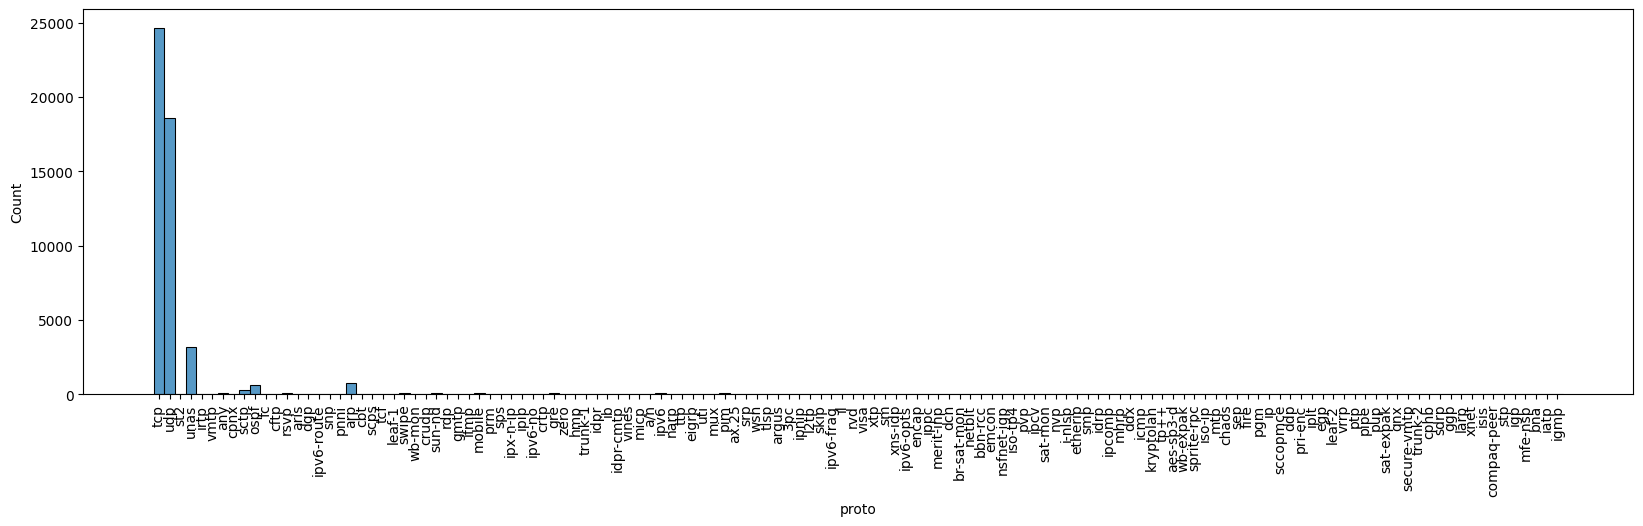

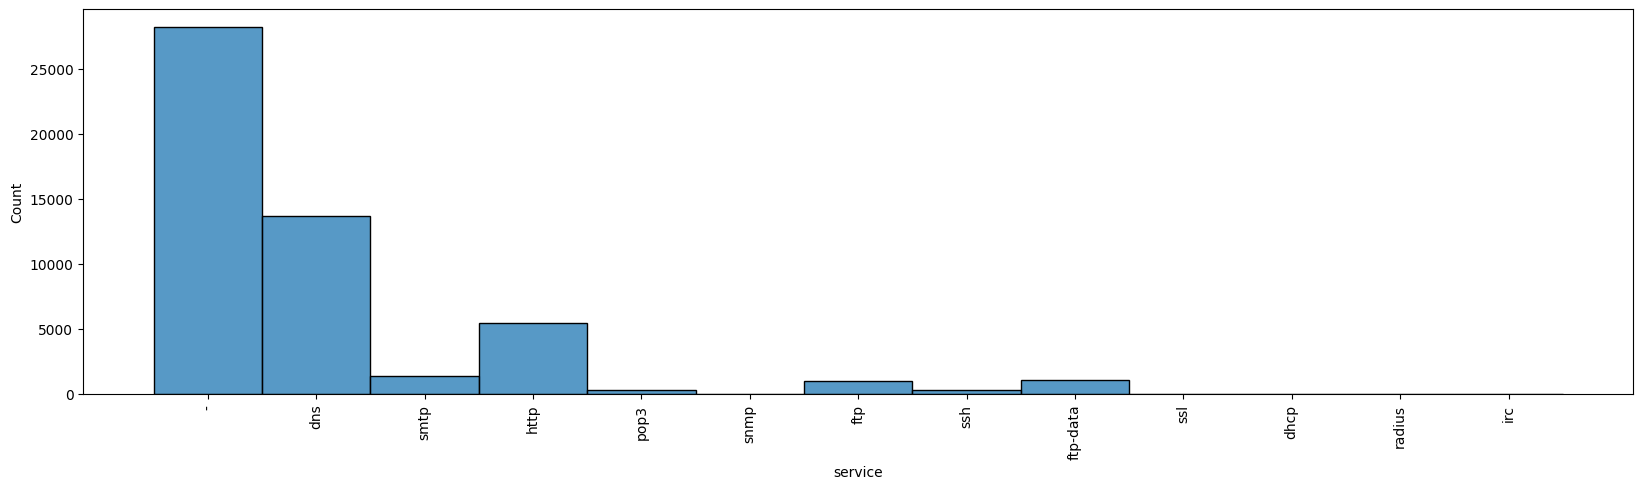

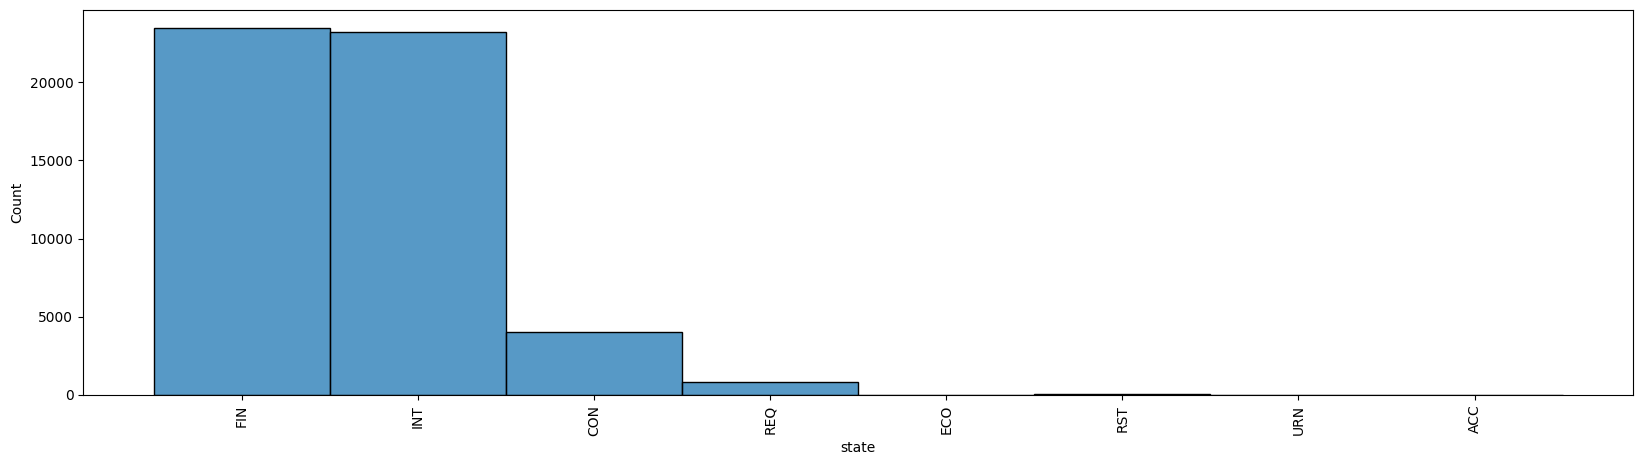

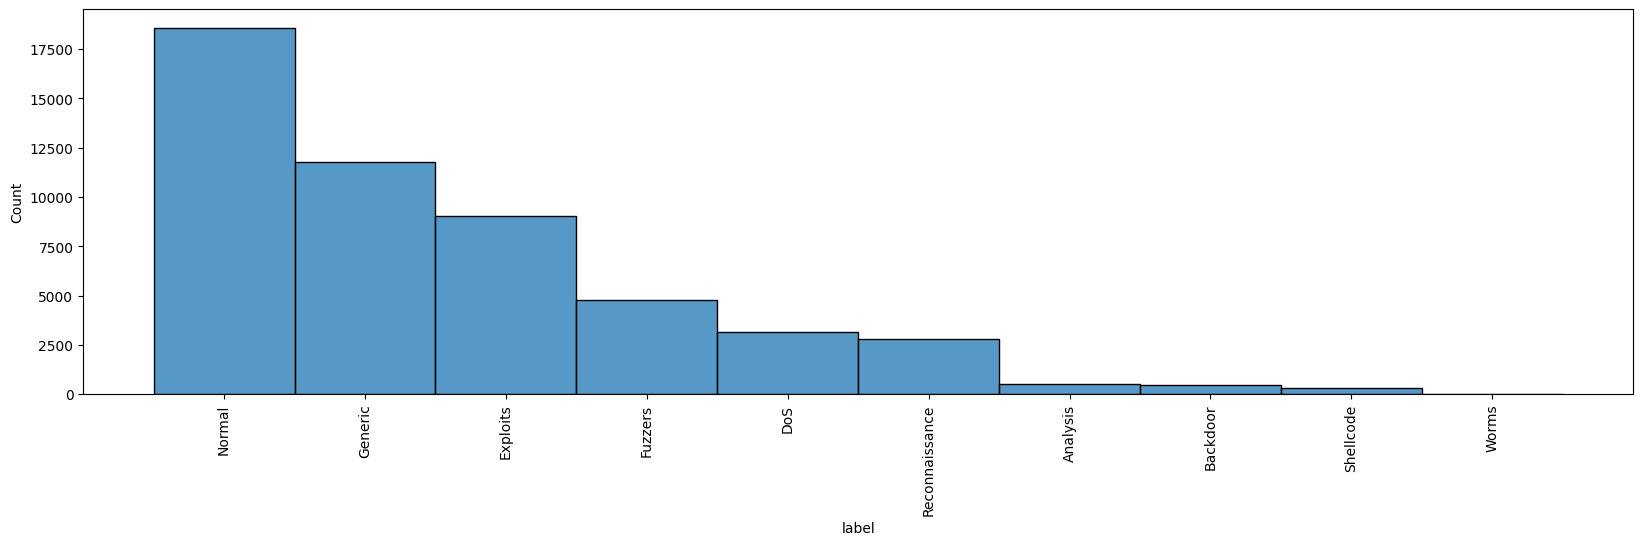

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

# Visualize histograms of categorical variables
for col in categorical_columns:
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    sns.histplot(data[col])    
    plt.show()

Separating features and labels

In [5]:
X_sep = data.drop(['label'], axis=1)  # Features
y_sep = data[['label']]  # Labels

In [6]:
X_sep

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,2.736664,tcp,-,FIN,232,438,13350,548216,244.458211,31,...,5,2,1,5,0,0,0,4,10,0
1,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,10,10,10,10,0,0,0,10,10,0
2,5.788526,tcp,-,FIN,36,34,6102,3892,11.920133,254,...,2,1,1,4,0,0,0,2,4,0
3,3.849634,tcp,-,FIN,448,858,25160,1094788,338.993271,31,...,3,2,1,6,0,0,0,2,9,0
4,0.001052,udp,dns,CON,2,2,130,162,2851.711087,31,...,4,1,1,1,0,0,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51529,0.001074,udp,dns,CON,2,2,146,178,2793.296014,31,...,2,1,1,1,0,0,0,2,1,0
51530,0.898216,tcp,-,FIN,14,12,794,678,27.832949,254,...,1,1,1,4,0,0,0,1,4,0
51531,0.000004,udp,dns,INT,2,0,114,0,250000.000600,254,...,5,5,2,5,0,0,0,5,7,0
51532,0.000004,udp,dns,INT,2,0,114,0,250000.000600,254,...,14,14,14,30,0,0,0,15,30,0


In [7]:
y_sep

,label
0,Normal
1,Generic
2,Exploits
3,Normal
4,Normal
...,...
51529,Normal
51530,Fuzzers
51531,Generic
51532,Generic


Perform Standard scaling of numerical variables in the input DataFrame

$$z=\frac{x-\mu}{\sigma}$$

In [8]:
from sklearn.preprocessing import StandardScaler

# Numerical feature scaling
scaler = StandardScaler()
X_sep[numerical_columns] = scaler.fit_transform(X_sep[numerical_columns])

One-hot encode categorical variables in input and label DataFrames

![image.png](res/onehot.png)

In [9]:
from sklearn.preprocessing import OneHotEncoder

# Function takes all column names in cols and one-hot-encodes them
def one_hot_encode(df, cols):

    df_combined = df.copy()

    for col in cols:
        if col not in df.columns:
            continue

        # Initialize OneHotEncoder
        one_hot_encoder = OneHotEncoder(sparse_output=False)

        # Fit and transform the 'color' column
        encoded = one_hot_encoder.fit_transform(df_combined[[col]])
        
        # Get new column names for one-hot encoded
        colnam = one_hot_encoder.get_feature_names_out([col])

        # Convert to DataFrame        
        encoded_df = pd.DataFrame(encoded, columns=colnam, index=df_combined.index)
        
        # Combine with original DataFrame
        df_combined = pd.concat([df_combined, encoded_df], axis=1)
        # print(df_combined)

        # Remove the converted feature
        df_combined.drop(columns=[col], inplace=True)

    return df_combined

categorical_columns_X = [x for x in categorical_columns if x not in ['label'] ]
X = one_hot_encode(X_sep, categorical_columns_X)

categorical_columns_y = ['label']
y = one_hot_encode(y_sep, categorical_columns_y)

In [10]:
X

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssh,service_ssl,state_ACC,state_CON,state_ECO,state_FIN,state_INT,state_REQ,state_RST,state_URN
0,0.248616,1.365120,3.597541,0.017081,3.516067,-0.561603,-1.455841,-0.495763,-0.383370,0.397855,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.208448,-0.121059,-0.161913,-0.049190,-0.096407,0.114345,0.721492,-0.752766,-0.111814,-0.272630,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.758325,0.098637,0.129916,-0.019209,-0.070761,-0.563020,0.721492,1.480502,-0.383534,-0.270440,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.434500,2.760835,7.202497,0.076211,7.117708,-0.561026,-1.455841,-0.495763,-0.383299,0.680287,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.208273,-0.121059,-0.144747,-0.049110,-0.095340,-0.545706,-1.455841,-0.495763,-0.380927,-0.014333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51529,-0.208270,-0.121059,-0.144747,-0.049030,-0.095234,-0.546062,-1.455841,-0.495763,-0.380662,0.005365,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
51530,-0.058433,-0.043519,-0.058915,-0.045785,-0.091940,-0.562923,0.721492,1.480502,-0.383543,-0.270307,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51531,-0.208448,-0.121059,-0.161913,-0.049190,-0.096407,0.961142,0.721492,-0.752766,0.227891,-0.272630,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
51532,-0.208448,-0.121059,-0.161913,-0.049190,-0.096407,0.961142,0.721492,-0.752766,0.227891,-0.272630,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
y

,label_Analysis,label_Backdoor,label_DoS,label_Exploits,label_Fuzzers,label_Generic,label_Normal,label_Reconnaissance,label_Shellcode,label_Worms
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
51529,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
51530,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
51531,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51532,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Split the dataset into training and testing sets

![image.png](res/traintestset.png)

In [12]:
import torch
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to PyTorch tensors (if Dataset accepts PyTorch tensors)
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)
# Observe the highly imbalanced sizes of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Convert to numpy arrays (if Dataset accepts numpy arrays)
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values

torch.Size([36073, 192])
torch.Size([15461, 192])
torch.Size([36073, 10])
torch.Size([15461, 10])


#### Machine Learning setup

Create a Dataset class: needed by Pytorch framework to feed data in a DataLoader and then into the model during training and evaluation

Create a class to describe the NN architecture (can be visualized with TensorBoard if installed)

In [13]:
# Create custom Dataset class
import torch.nn as nn
from torch.utils.data import Dataset

class XyDataset(Dataset):
    def __init__(self, X, y):
        # X and y are PyTorch tensors
        self.X = X
        self.y = y
        
        # X and y are numpy arrays
        # self.X = torch.tensor(X, dtype=torch.float32)
        # self.y = torch.tensor(y, dtype=torch.float32)
        
        # X and y are numpy arrays (older approach)
        # self.X = torch.FloatTensor(X)
        # self.y = torch.LongTensor(y)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define a small Feedforward Neural Network
class FFNN_Small(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FFNN_Small, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Define a tiny Feedforward Neural Network
class FFNN_Tiny(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FFNN_Tiny, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, num_classes)
        )
    
    def forward(self, x):
        return self.layers(x)

Create training and test dataset objects

In [17]:
import tensorflow
train_dataset = XyDataset(X_train, y_train)
test_dataset = XyDataset(X_test, y_test)
# train_dataset = TensorDataset(X_train, y_train)
# test_dataset = TensorDataset(X_test, y_test)

Create DataLoaders

![dataloader](res/dataloader.png)

In [18]:
from torch.utils.data import DataLoader

batch_size = 1024
# batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Initialize model, choose loss function, and select optimizer. Explore the neural network architecture with TensorBoard

In [21]:
from torchviz import make_dot
import torch.optim as optim

# Select data size to build input and output layers of neural network
input_size = X_train.shape[1]
num_classes = y_train.shape[1]
# For dataframes: #len(y_train.columns)

# Select the model to use
model = FFNN_Tiny(input_size, num_classes)
# model = FFNN_Small(input_size, num_classes)

# Choose the loss function
# criterion = nn.BCELoss()  # For binary classification
# criterion = nn.CrossEntropyLoss()  # For multi-class classification with categorical output
criterion = nn.BCEWithLogitsLoss()  # For multi-class classification with one-hot output

optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer = optim.Adam(model.parameters(), lr=0.01) #Faster but more unstable

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Obtains a summary of the created model
from torchsummary import summary
summary(model, input_size=(input_size,)) #X_train.values[0].shape

# Visualize the architecture and model computational tree from backprop with torchviz
x_try = torch.randn((input_size,)).to(device) #X_train.values[0].shape
y_try = model(x_try)
dot = make_dot(y_try, params=dict(model.named_parameters()))
dot.render("model_architecture", format="png")  # Saves as PNG file

# Explore architecture graph with TensorBoard
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
writer.add_graph(model, x_try)
writer.close()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]           1,930
Total params: 1,930
Trainable params: 1,930
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [22]:
# Initialize recorders

train_metrics = []
test_metrics = []

Train and evaluate model on training and test dataset with the metrics:

$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN} \qquad \text{Recall} = \frac{TP}{TP+FN} \qquad \text{Precision} = \frac{TP}{TP+FP} \qquad \text{F1-Score} = \frac{2}{1/\text{Precision} + 1/\text{Recall}} $$

[Google Classifier Applet](https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall)

In [25]:
# Train model on training dataset (one epoch)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training(model, optimizer, criterion, train_loader):
    
    # Set the model to training mode
    model.to(device)
    model.train()

    # Initialize epoch-wise cumulative training metrics
    train_loss = 0.0
    train_preds, train_targets = [], []

    for inputs, labels in train_loader:

        # Move inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device).float()
        
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
                
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Aggregate metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        _, targets = torch.max(labels.data, 1)
        train_preds.extend(predicted.cpu().numpy())
        train_targets.extend(targets.cpu().numpy())

    # Compute epoch-wise training metrics
    train_loss /= len(train_loader)
    train_acc = accuracy_score(train_targets, train_preds)
    train_prec = precision_score(train_targets, train_preds, average='weighted', zero_division=0)
    train_rec = recall_score(train_targets, train_preds, average='weighted', zero_division=0)
    train_f1 = f1_score(train_targets, train_preds, average='weighted', zero_division=0)
    
    # Pack training metrics
    train_metric = {'loss': train_loss, 'accuracy': train_acc, 'precision': train_prec, 'recall': train_rec, 'f1': train_f1}

    return train_metric

In [26]:
# Evaluate model performance on test dataset (one epoch)

def evaluation(model, criterion, test_loader):
    
    # Set the model to evaluation mode
    model.eval()

    # Initialize epoch-wise cumulative test metrics
    test_loss = 0
    test_preds, test_targets = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            # Move inputs and labels to GPU
            inputs, labels = inputs.to(device), labels.to(device).float()
            
            # Forward pass
            outputs = model(inputs)
    
            # Compute loss            
            loss = criterion(outputs.squeeze(), labels)
            
            # Aggregate metrics
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            _, targets = torch.max(labels.data, 1)
            test_preds.extend(predicted.cpu().numpy())
            test_targets.extend(targets.cpu().numpy())
    
    # Compute epoch-wise test metrics
    test_loss /= len(test_loader)
    

    # Compute validation metrics
    test_acc = accuracy_score(test_targets, test_preds)
    test_prec = precision_score(test_targets, test_preds, average='weighted', zero_division=0)
    test_rec = recall_score(test_targets, test_preds, average='weighted', zero_division=0)
    test_f1 = f1_score(test_targets, test_preds, average='weighted', zero_division=0)

    # Pack test metrics
    test_metric = {'loss': test_loss, 'accuracy': test_acc, 'precision': test_prec, 'recall': test_rec, 'f1': test_f1}

    return test_metric


In [27]:
# Train and test the model

num_epochs = 100

for epoch in range(num_epochs):   

    ### Model TRAINING (one epoch)
    train_metric = training(model, optimizer, criterion, train_loader)
    
    # Store train metrics
    train_metrics.append(train_metric)

    # Print test metric dict
    print("Epoch", epoch, "Train", train_metric)
     
    ### Model VALIDATION (one epoch)
    test_metric = evaluation(model, criterion, test_loader)

    # Store test metrics    
    test_metrics.append(test_metric)

    # Print test metric dict
    print("Epoch", epoch, "Test", test_metric)


Epoch 0 Train {'loss': 0.669146039419704, 'accuracy': 0.348376902392371, 'precision': 0.42127619181888193, 'recall': 0.348376902392371, 'f1': 0.36436417855117376}
Epoch 0 Test {'loss': 0.6284614726901054, 'accuracy': 0.513291507664446, 'precision': 0.46455641710873363, 'recall': 0.513291507664446, 'f1': 0.4646522701766271}
Epoch 1 Train {'loss': 0.5969182584020827, 'accuracy': 0.5359132869459152, 'precision': 0.4917295999588918, 'recall': 0.5359132869459152, 'f1': 0.4903465608886903}
Epoch 1 Test {'loss': 0.5671811997890472, 'accuracy': 0.5641937778927625, 'precision': 0.5365425129680699, 'recall': 0.5641937778927625, 'f1': 0.5179312158474358}
Epoch 2 Train {'loss': 0.5413035750389099, 'accuracy': 0.5772461397721287, 'precision': 0.5431238571973269, 'recall': 0.5772461397721287, 'f1': 0.5358553206792082}
Epoch 2 Test {'loss': 0.5169095247983932, 'accuracy': 0.5859258780156523, 'precision': 0.571429335223445, 'recall': 0.5859258780156523, 'f1': 0.5498569918506312}
Epoch 3 Train {'loss':

Visualize performance in plots

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_metrics(train_metrics, test_metrics):
    epochs = range(1, len(train_metrics) + 1)
    train_df = pd.DataFrame(train_metrics)
    test_df = pd.DataFrame(test_metrics)

    metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1']
    titles = ['Loss', 'Accuracy', 'Precision', 'Recall' , 'F1-score']

    for metric, title in zip(metrics, titles):
        plt.figure(figsize=(5, 4))
        plt.plot(epochs, train_df[metric], 'b', label='Training ' + title)
        plt.plot(epochs, test_df[metric], 'r', label='Test ' + title)
        plt.title('Training and Test ' + title)
        plt.xlabel('Epochs')
        plt.ylabel(title)
        plt.legend()
        plt.show()


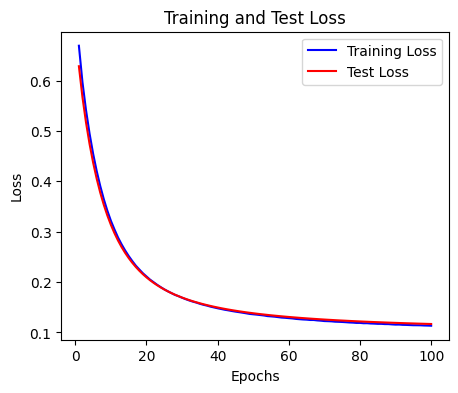

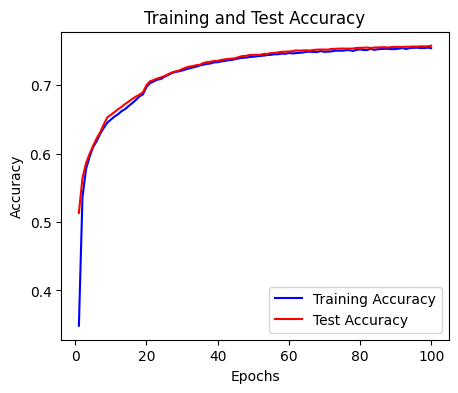

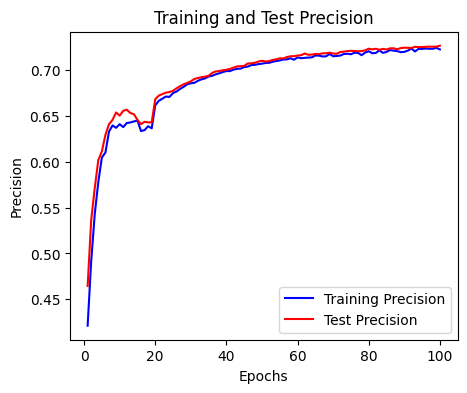

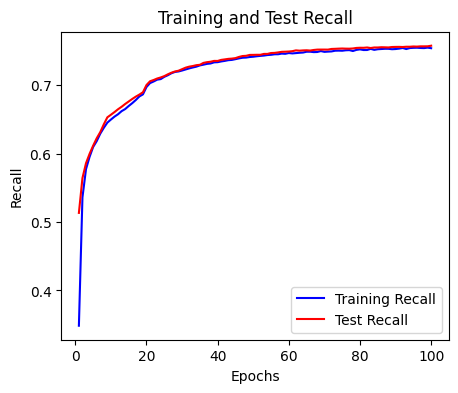

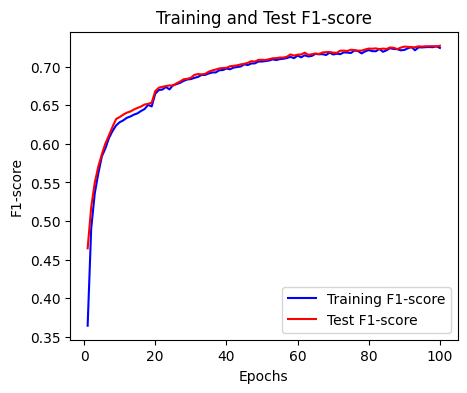

In [29]:
# Plot metrics
plot_metrics(train_metrics, test_metrics)